# Big Data analytics mini project on Pesticides dealers license report
# Dataset:Pesticides_Dealers_License_Report.csv
# source: https://www.data.gov.in/resource/pesticides-dealers-license-report

# 🌐 Dataset Overview
The dataset provides information on pesticide dealers across districts and Taluks (Mandals). Key variables include district names, Taluk names, and the number of pesticide dealers (Pesticides_Dealers_Num). This data allows for understanding the distribution of licenses geographically and identifying areas with higher dealer concentrations.

# 🏢 Licenses by District
Certain districts have significantly higher numbers of pesticide dealers, indicating concentrated commercial activity. Ordering districts by total dealers highlights the top districts with the most licenses, helping policymakers and regulators identify high-activity regions.

# 📍 Licenses by Taluk (Mandal)
At a more granular level, Taluk-wise grouping reveals which Taluks have the highest dealer counts. The top Taluks account for a large portion of total licenses, emphasizing the importance of localized management and monitoring.

# 📊 District + Taluk Combination
Analyzing the combination of districts and Taluks shows hierarchical distribution patterns. This helps to pinpoint Taluks within high-activity districts that might require closer inspection or regulatory support.

# 📈 Visualization Highlights

Bar Chart – Licenses by District: Provides a clear view of which districts have the most pesticide dealers.

Pie Chart – Top 10 Districts: Shows the proportion of licenses held by the top 10 districts.

Bar Chart – Top Taluks: Displays the top Taluks by number of pesticide dealers, illustrating local concentrations.

Note on Top Dealers: Individual dealer names are not present in the dataset; therefore, identifying top dealers is not feasible.

# 💡 Key Insights

Dealer licenses are highly concentrated in a few districts and Taluks.

Geographic distribution varies significantly, showing areas of high and low activity.

The Taluk-level view provides more granular insight for targeted regulation.

# 🔍 Recommendations

Regulatory Focus: High-license districts and Taluks may require more frequent monitoring or inspections.

Resource Allocation: Use district and Taluk data to allocate training, support, or compliance resources effectively.

Further Analysis: Combine this data with crop production or pesticide usage trends to optimize interventions.

# 📉 Visualization Summary
The bar and pie charts illustrate both absolute numbers and relative shares, making it easy to identify high-activity regions at a glance. This visual summary is essential for planning, reporting, and decision-making.

In [8]:
# -------------------------------------------------
# Pesticides Dealers License Report - PySpark + Graphs
# -------------------------------------------------

# Step 1: Import Libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, desc
from pyspark.sql.functions import sum, avg, countDistinct
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# Step 2: Create Spark Session
spark = SparkSession.builder \
    .appName("Pesticides Dealers License Report Analytics") \
    .getOrCreate()

In [10]:
# Step 3: Load Dataset
file_path = "Pesticides_Dealers_License_Report.csv"  # Change if needed
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [11]:
# Step 4: Data Exploration
print("\n✅ Schema of Dataset:")
df.printSchema()


✅ Schema of Dataset:
root
 |-- Sl No: integer (nullable = true)
 |-- District: string (nullable = true)
 |-- Taluk: string (nullable = true)
 |-- Pesticides Dealers (Numbers): integer (nullable = true)



In [12]:

print("\n✅ Total Records:", df.count())
df.show(5, truncate=False)


✅ Total Records: 206
+-----+--------+--------+----------------------------+
|Sl No|District|Taluk   |Pesticides Dealers (Numbers)|
+-----+--------+--------+----------------------------+
|1    |Belgaum |Chikkodi|139                         |
|2    |Belgaum |Athani  |182                         |
|3    |Belgaum |Raibag  |132                         |
|4    |Belgaum |Gokak   |170                         |
|5    |Belgaum |Hukkeri |107                         |
+-----+--------+--------+----------------------------+
only showing top 5 rows


In [13]:
from pyspark.sql.functions import sum, avg, countDistinct

# Total number of dealers across dataset
total_dealers = df.agg(sum("Pesticides Dealers (Numbers)").alias("Total_Dealers")).collect()[0][0]
print("\n🔹 Total Dealers:", total_dealers)

# Unique Districts
unique_districts = df.select(countDistinct("District")).collect()[0][0]
print("\n🔹 Unique Districts:", unique_districts)

# Unique Taluks
unique_taluks = df.select(countDistinct("Taluk")).collect()[0][0]
print("\n🔹 Unique Taluks:", unique_taluks)

# Average dealers per Taluk
avg_dealers = df.agg(avg("Pesticides Dealers (Numbers)").alias("Avg_Dealers")).collect()[0][0]
print("\n🔹 Average Dealers per Taluk:", avg_dealers)



🔹 Total Dealers: 12803

🔹 Unique Districts: 30

🔹 Unique Taluks: 206

🔹 Average Dealers per Taluk: 62.150485436893206


In [21]:
from pyspark.sql import functions as F

# rename messy column to something safe
df = df.withColumnRenamed("Pesticides Dealers (Numbers)", "Pesticides_Dealers_Num")

# aggregate
licenses_by_district = (
    df.groupBy("District")
      .agg(F.sum("Pesticides_Dealers_Num").alias("total_dealers"))
      .orderBy(F.desc("total_dealers"))
)

licenses_by_district.show(10)


+---------------+-------------+
|       District|total_dealers|
+---------------+-------------+
|        Belgaum|         1105|
|        Raichur|         1075|
|        Bellary|          873|
|         Haveri|          744|
|      Davangere|          735|
|     Vijayapura|          686|
|         Yadgir|          594|
|Bangalore Urban|          573|
|      Kalaburgi|          536|
|         Hassan|          492|
+---------------+-------------+
only showing top 10 rows


In [25]:
from pyspark.sql import functions as F

# 3. Licenses by Taluk (instead of Mandal)
licenses_by_taluk = (
    df.groupBy("Taluk")
      .agg(F.sum("Pesticides_Dealers_Num").alias("total_dealers"))
      .orderBy(F.desc("total_dealers"))
)
licenses_by_taluk.show(10)

+---------------+-------------+
|          Taluk|total_dealers|
+---------------+-------------+
|        Bellary|          324|
|     Davanagere|          318|
|      Sindhanur|          287|
|        Raichur|          270|
|          Manvi|          231|
|Bangalore North|          212|
|     Gangavathi|          208|
|       Shahapur|          204|
|         Athani|          182|
|Bangalore South|          173|
+---------------+-------------+
only showing top 10 rows


In [26]:

# 4. Top Districts with highest total dealers
top_districts = (
    df.groupBy("District")
      .agg(F.sum("Pesticides_Dealers_Num").alias("total_dealers"))
      .orderBy(F.desc("total_dealers"))
)
top_districts.show(10)

+---------------+-------------+
|       District|total_dealers|
+---------------+-------------+
|        Belgaum|         1105|
|        Raichur|         1075|
|        Bellary|          873|
|         Haveri|          744|
|      Davangere|          735|
|     Vijayapura|          686|
|         Yadgir|          594|
|Bangalore Urban|          573|
|      Kalaburgi|          536|
|         Hassan|          492|
+---------------+-------------+
only showing top 10 rows


In [27]:
# 5. District & Taluk Combination
district_taluk_combo = (
    df.groupBy("District", "Taluk")
      .agg(F.sum("Pesticides_Dealers_Num").alias("total_dealers"))
      .orderBy(F.desc("total_dealers"))
)
district_taluk_combo.show(10)

+---------------+---------------+-------------+
|       District|          Taluk|total_dealers|
+---------------+---------------+-------------+
|        Bellary|        Bellary|          324|
|      Davangere|     Davanagere|          318|
|        Raichur|      Sindhanur|          287|
|        Raichur|        Raichur|          270|
|        Raichur|          Manvi|          231|
|Bangalore Urban|Bangalore North|          212|
|         Koppal|     Gangavathi|          208|
|         Yadgir|       Shahapur|          204|
|        Belgaum|         Athani|          182|
|Bangalore Urban|Bangalore South|          173|
+---------------+---------------+-------------+
only showing top 10 rows


In [29]:
# Convert PySpark -> Pandas for plotting
pdf_district = top_districts.toPandas()        # District-level totals
pdf_taluk = licenses_by_taluk.toPandas()      # Taluk-level totals
pdf_district_taluk = district_taluk_combo.toPandas()  # District+Taluk combo


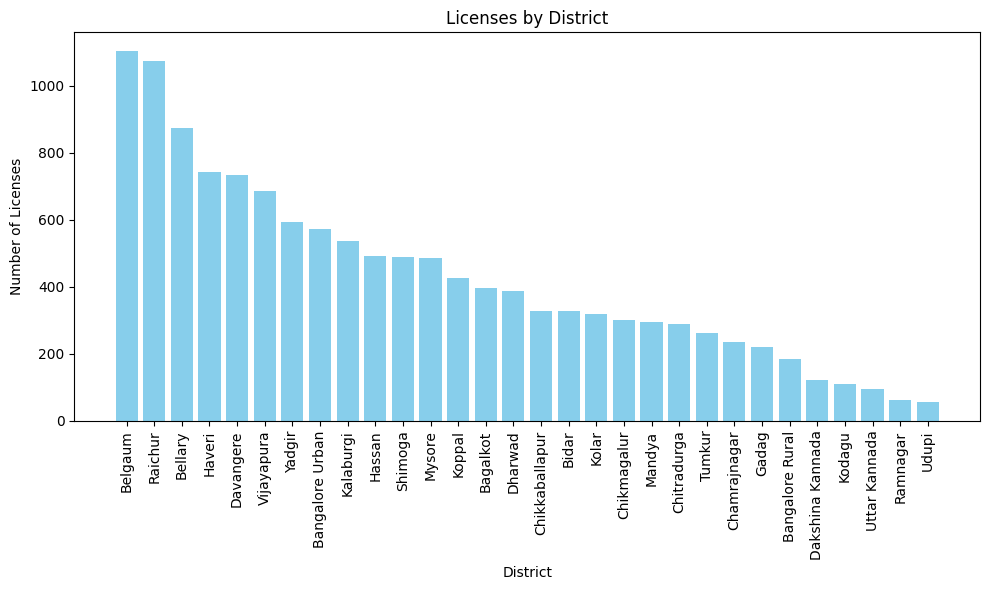

In [31]:

# ---- Graph 1: Bar Chart - Licenses by District ----
plt.figure(figsize=(10,6))
plt.bar(pdf_district["District"], pdf_district["total_dealers"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Licenses by District")
plt.xlabel("District")
plt.ylabel("Number of Licenses")
plt.tight_layout()
plt.show()

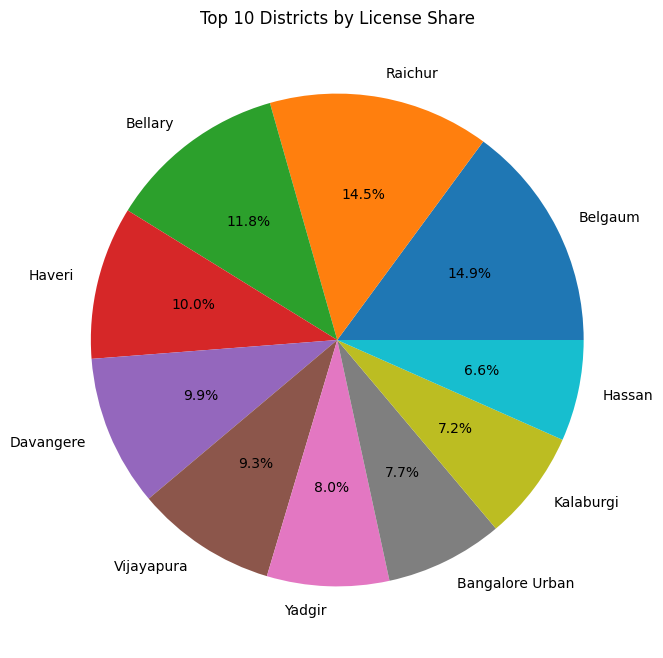

In [32]:
# ---- Graph 2: Pie Chart - Top 10 Districts ----
plt.figure(figsize=(8,8))
plt.pie(pdf_district["total_dealers"][:10], labels=pdf_district["District"][:10], autopct="%1.1f%%")
plt.title("Top 10 Districts by License Share")
plt.show()

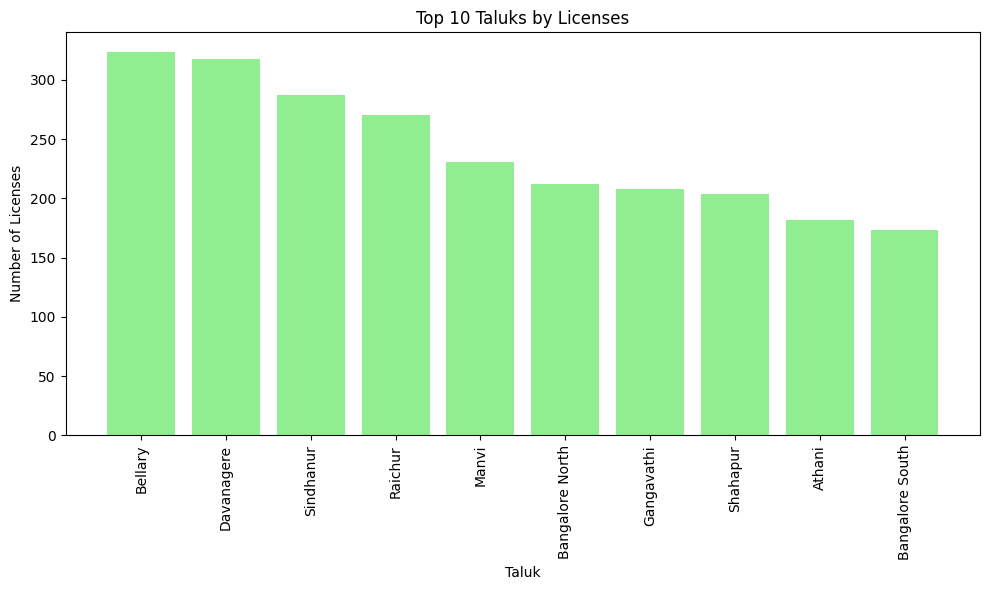

In [33]:

# ---- Graph 3: Bar Chart - Licenses by Taluk (Top 10) ----
plt.figure(figsize=(10,6))
plt.bar(pdf_taluk["Taluk"][:10], pdf_taluk["total_dealers"][:10], color="lightgreen")
plt.xticks(rotation=90)
plt.title("Top 10 Taluks by Licenses")
plt.xlabel("Taluk")
plt.ylabel("Number of Licenses")
plt.tight_layout()
plt.show()